<a href="https://colab.research.google.com/github/ola-sumbo/blog/blob/master/SCD_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px

In [44]:
#load image
from google.colab import files
uploaded = files.upload()

Saving Map-of-Nigeria.png to Map-of-Nigeria.png


In [5]:
!pip install pandas
!pip install xlrd

In [6]:
df = pd.read_excel('/content/data scd.xlsx', sheet_name="data")
df.head()

,Country,Hospital name abbreviation,State,Geopolitical zone,Number,Latitude,Longitude
0,NGN,UMTH,Borno,North East,200,11.884636,13.151967
1,NGN,"FTH, GOMBE",Gombe,North East,78,10.363779,11.192759
2,NGN,FMC Yola,Yola,North East,81,9.208390,12.481460
3,NGN,BDTH,Kaduna,North West,243,10.376401,7.709454
4,NGN,ABUTH,Kaduna,North West,599,10.376401,7.709454


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
'State' in df.columns

False

In [10]:
df.columns

Index(['Country', 'Hospital name abbreviation', 'State ', 'Geopolitical zone',
       'Number', 'Latitude ', 'Longitude '],
      dtype='object')

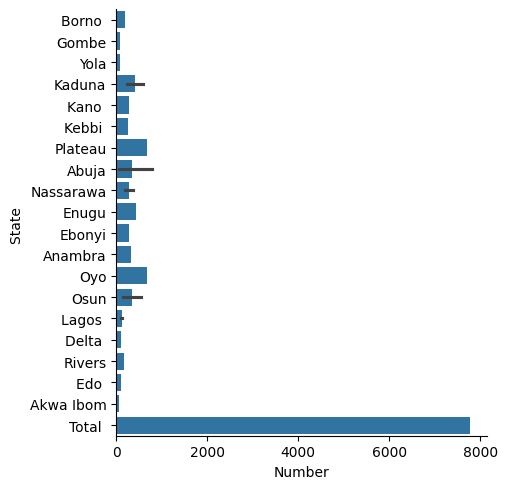

In [10]:
sns.catplot(data=df, x='Number', y='State ', kind='bar')
plt.show()

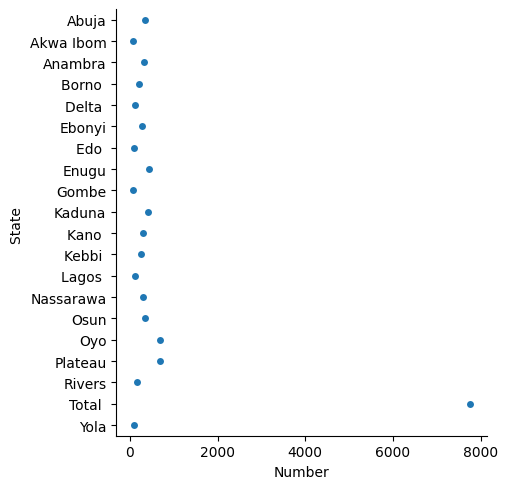

In [ ]:
grouped_data = df.groupby('State ')['Number'].mean().reset_index()
sns.catplot(x='Number', y='State ', data=grouped_data)
plt.show()

In [11]:
import geopandas as gpd

In [12]:
!pip install geopy

In [13]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Latitude '], df['Longitude ']))

In [14]:
gdf

,Country,Hospital name abbreviation,State,Geopolitical zone,Number,Latitude,Longitude,geometry
0,NGN,UMTH,Borno,North East,200,11.884636,13.151967,POINT (11.88464 13.15197)
1,NGN,"FTH, GOMBE",Gombe,North East,78,10.363779,11.192759,POINT (10.36378 11.19276)
2,NGN,FMC Yola,Yola,North East,81,9.208390,12.481460,POINT (9.20839 12.48146)
3,NGN,BDTH,Kaduna,North West,243,10.376401,7.709454,POINT (10.37640 7.70945)
4,NGN,ABUTH,Kaduna,North West,599,10.376401,7.709454,POINT (10.37640 7.70945)
5,NGN,AKTH,Kano,North West,291,11.747070,8.524711,POINT (11.74707 8.52471)
6,NGN,"FMC, BK",Kebbi,North West,250,11.494200,4.233335,POINT (11.49420 4.23334)
7,NGN,JUTH,Plateau,North Central,679,9.218209,9.517949,POINT (9.21821 9.51795)
8,NGN,UATH,Abuja,North Central,1180,9.057850,7.495080,POINT (9.05785 7.49508)
9,NGN,FMC KEFFI,Nassarawa,North Central,378,8.499791,8.199694,POINT (8.49979 8.19969)


In [15]:
BoundBox = (df['Longitude '].min(),   df['Longitude '].max(), df['Latitude '].min(), df['Latitude '].max())
BoundBox

(-90.7354508, 13.1519665, 4.824167, 33.7453784)

In [28]:
!sudo apt-get install ghostscript-x

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  ghostscript-x libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  poppler-data
0 upgraded, 11 newly installed, 0 to remove and 31 not upgraded.
Need to get 16.8 MB of archives.
After this operation, 63.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1buil

In [29]:
ax.imshow?

In [ ]:
gdf.crs = "EPSG:4326"

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
world_gdf = gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
world_gdf.crs

<Projected CRS: +proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +un ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

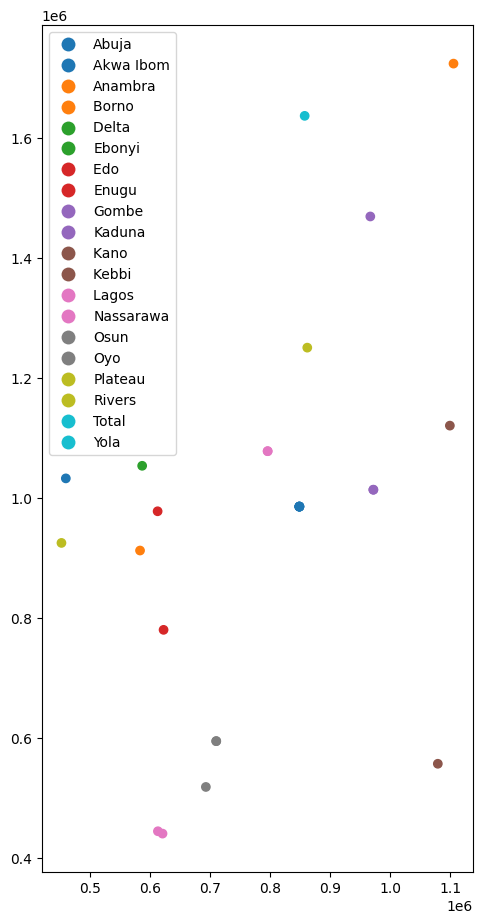

In [ ]:
figsize = (20, 11)

world_gdf.plot('State ', legend=True, figsize=figsize);

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with the point and specify the initial CRS
geometry = [Point(xy) for xy in zip(df['Longitude '], df['Latitude '])]
crs = 'EPSG:4326'  # Specify the initial CRS (e.g., WGS84)
gdf_v = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Reproject the GeoDataFrame to the desired CRS
desired_crs = 'EPSG:3857'  # Specify the desired CRS
gdf_reprojected = gdf_v.to_crs(desired_crs)

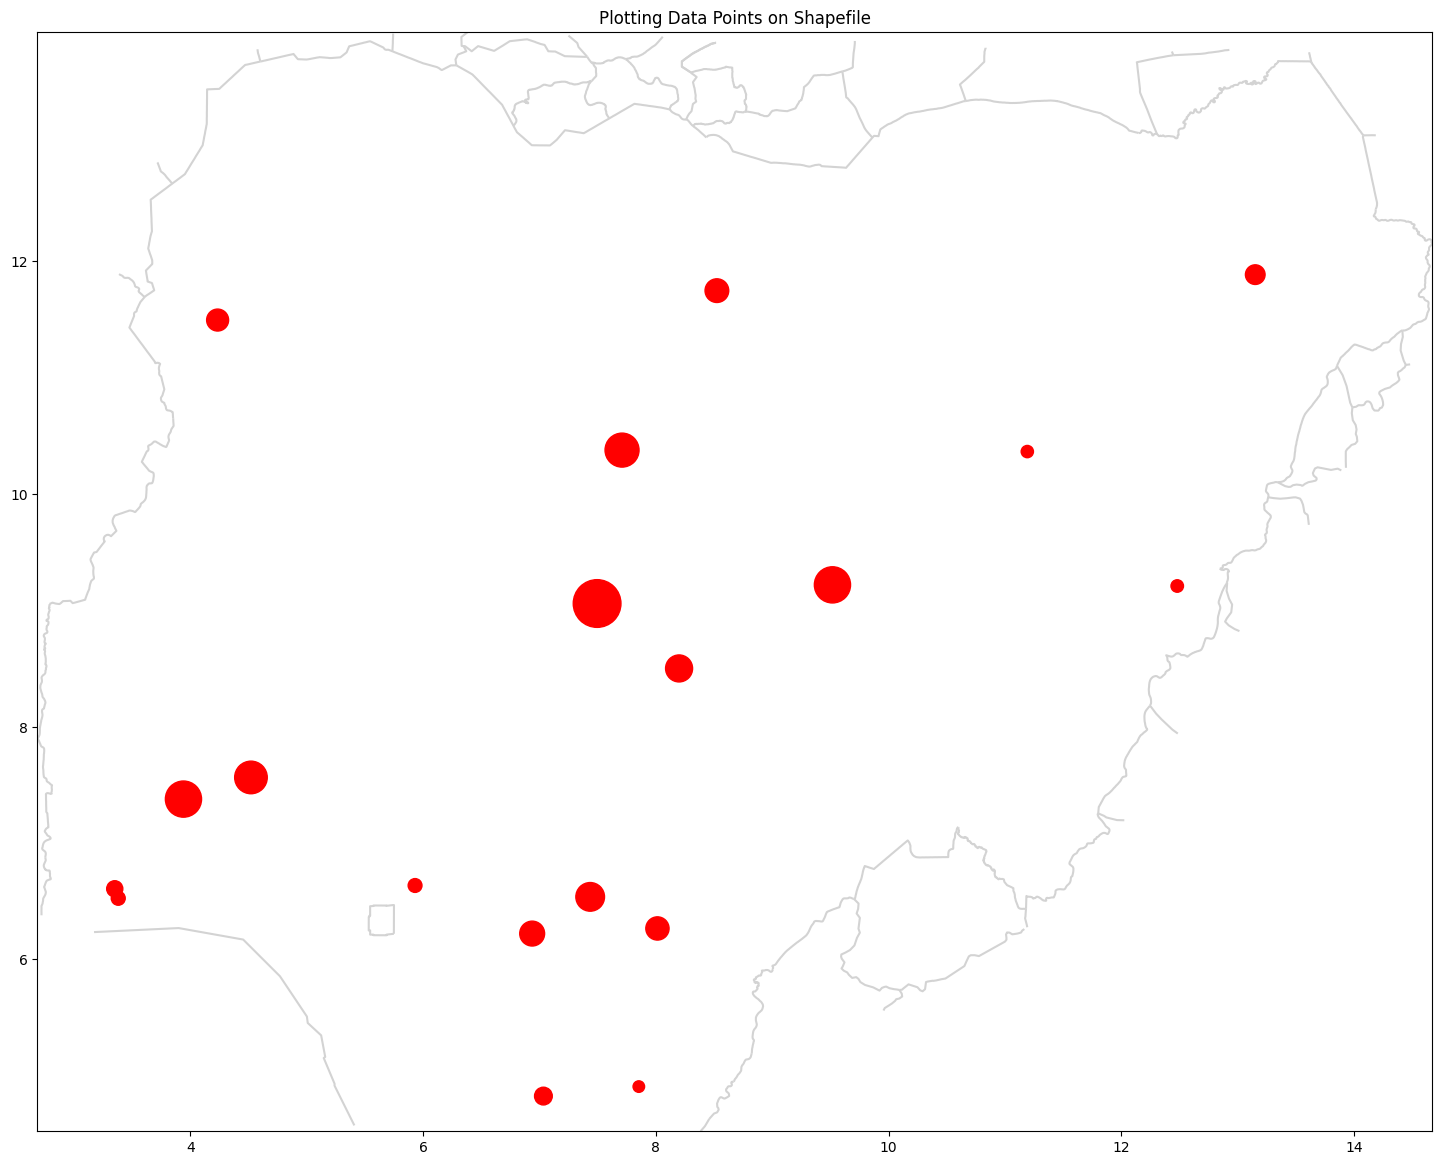

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the shapefile
shapefile = gpd.read_file('/content/nigeria_administrative.shp')


# Set the boundary box
BoundBox = [shapefile.total_bounds[0], shapefile.total_bounds[2], shapefile.total_bounds[1], shapefile.total_bounds[3]]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(18, 15))

# Plot the data points
ax.scatter(df['Longitude '], df['Latitude '],df['Number'], zorder=1, c='r', marker='o')

# Set the title
ax.set_title('Plotting Data Points on Shapefile')

# Set the x and y limits
ax.set_xlim(BoundBox[0], BoundBox[1])
ax.set_ylim(BoundBox[2], BoundBox[3])

# Plot the shapefile
shapefile.plot(ax=ax, color='lightgrey')

# Show the plot
plt.show()

In [5]:
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.5 MB/s eta 0:00:00


In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

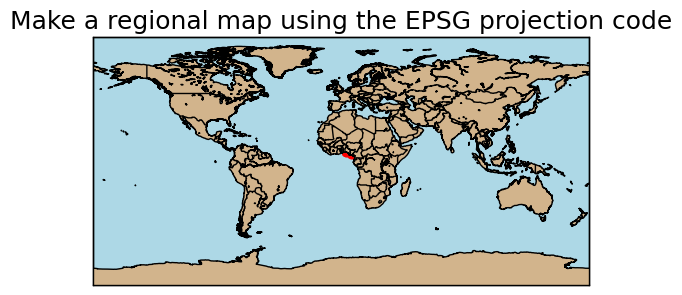

In [ ]:
# Create a Basemap object with the desired projection
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90, resolution='l')

# Add the CRS points to the map
m.scatter(df['Longitude '], df['Latitude '], latlon=True, c='r', marker='o')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawcountries(linewidth=1, linestyle='solid', color='k' )
m.drawmapboundary(fill_color='lightblue')
plt.title("Make a regional map using the EPSG projection code", fontsize=18)

# Save the map to an image file
plt.savefig('map.png')

In [ ]:
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 3.1 MB/s eta 0:00:00


Text(0.5, 1.0, 'High resolution')

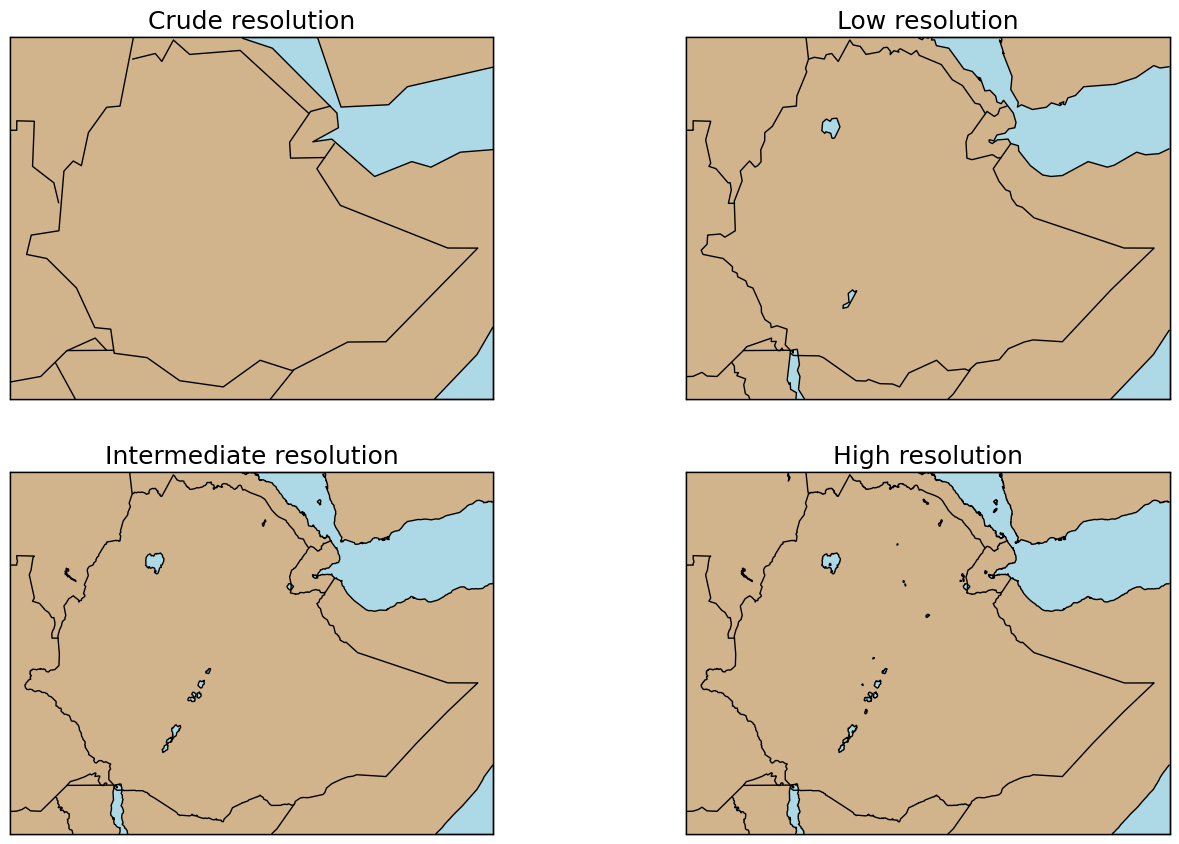

In [ ]:
fig = plt.figure(figsize = (16,16))
ax1 = plt.subplot2grid((3,2), (0,0))
ax2 = plt.subplot2grid((3,2), (0,1))
ax3 = plt.subplot2grid((3,2), (1,0))
ax4 = plt.subplot2grid((3,2), (1,1))
m1 = Basemap(llcrnrlon=32.5,llcrnrlat=3,urcrnrlon=48.5, urcrnrlat=15, ax=ax1, resolution = 'c')
m1.scatter(df['Longitude '], df['Latitude '], latlon=True, c='r', marker='o')
m1.drawcoastlines()
m1.fillcontinents(color='tan',lake_color='lightblue')
m1.drawcountries(linewidth=1, linestyle='solid', color='k' )
m1.drawmapboundary(fill_color='lightblue')
plt.title("Crude resolution", fontsize=18)
ax1.set_title("Crude resolution", fontsize=18)

m2 = Basemap(llcrnrlon=32.5,llcrnrlat=3,urcrnrlon=48.5, urcrnrlat=15, ax=ax2, resolution = 'l')
m2.scatter(df['Longitude '], df['Latitude '], latlon=True, c='r', marker='o')
m2.drawcoastlines()
m2.fillcontinents(color='tan',lake_color='lightblue')
m2.drawcountries(linewidth=1, linestyle='solid', color='k' )
m2.drawmapboundary(fill_color='lightblue')
ax2.set_title("Low resolution", fontsize=18)

m3 = Basemap(llcrnrlon=32.5,llcrnrlat=3,urcrnrlon=48.5, urcrnrlat=15, ax=ax3, resolution = 'i')
m3.scatter(df['Longitude '], df['Latitude '], latlon=True, c='r', marker='o')
m3.drawcoastlines()
m3.fillcontinents(color='tan',lake_color='lightblue')
m3.drawcountries(linewidth=1, linestyle='solid', color='k' )
m3.drawmapboundary(fill_color='lightblue')
ax3.set_title("Intermediate resolution", fontsize=18)

m4 = Basemap(llcrnrlon=32.5,llcrnrlat=3,urcrnrlon=48.5, urcrnrlat=15, ax=ax4, resolution = 'h')
m4.scatter(df['Longitude '], df['Latitude '], latlon=True, c='r', marker='o')
m4.drawcoastlines()
m4.fillcontinents(color='tan',lake_color='lightblue')
m4.drawcountries(linewidth=1, linestyle='solid', color='k' )
m4.drawmapboundary(fill_color='lightblue')
ax4.set_title("High resolution", fontsize=18)

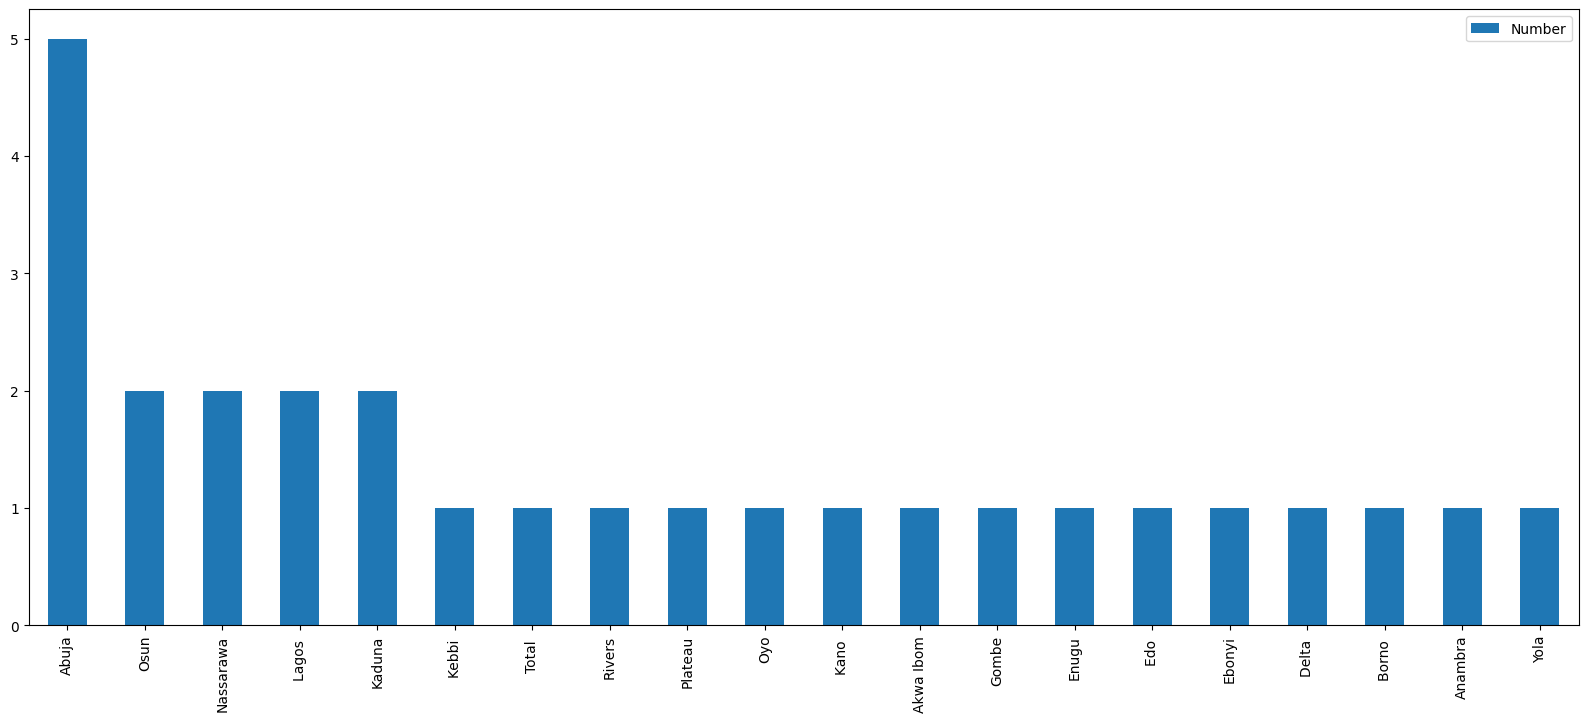

In [ ]:
df_countries = gdf.groupby(by="State ").agg({'Number':'count'}).reset_index().sort_values(by='Number', ascending=False)
ax = df_countries.plot.bar(x='State ', xlabel = '', figsize=(20,8))

In [ ]:
# extract lattitude
lat = df.iloc[:, 5]

# extract longitude
lon = df.iloc[:, 6]

print(lat, lon)

0     11.884636
1     10.363779
2      9.208390
3     10.376401
4     10.376401
5     11.747070
6     11.494200
7      9.218209
8      9.057850
9      8.499791
10     9.057850
11     8.499791
12     9.057850
13     9.057850
14     9.057850
15     6.536353
16     6.264923
17     6.220900
18     7.376736
19     7.562896
20     6.524379
21     7.562896
22     6.605874
23    33.745378
24     4.824167
25     6.634183
26     4.905737
27          NaN
Name: Latitude , dtype: float64 0     13.151967
1     11.192759
2     12.481460
3      7.709454
4      7.709454
5      8.524711
6      4.233335
7      9.517949
8      7.495080
9      8.199694
10     7.495080
11     8.199694
12     7.495080
13     7.495080
14     7.495080
15     7.435619
16     8.013730
17     6.936956
18     3.939786
19     4.519959
20     3.379206
21     4.519959
22     3.349149
23   -90.735451
24     7.033611
25     5.930406
26     7.853668
27          NaN
Name: Longitude , dtype: float64


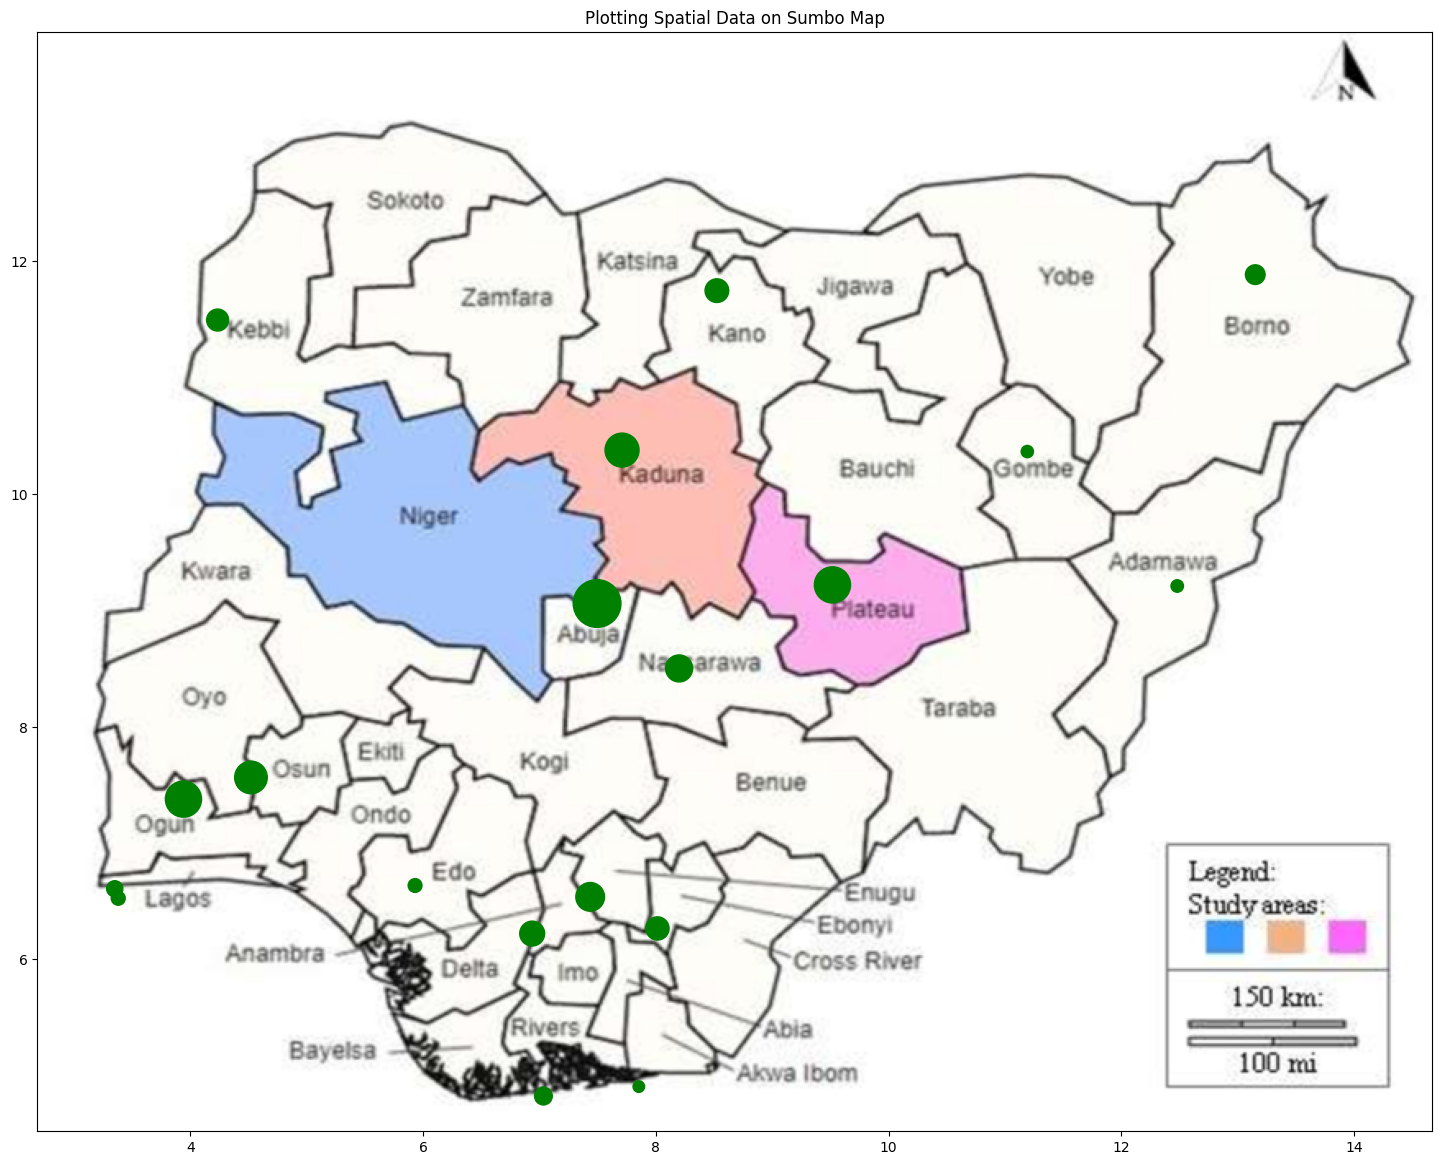

In [48]:
plt.close('all')
fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(df['Longitude '], df['Latitude '], df['Number'], zorder=1, c='g')
ax.set_title('Plotting Spatial Data on Sumbo Map')
ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])
ruh_m = plt.imread('/content/Map-of-Nigeria.png')
ax.imshow(ruh_m, zorder=0, extent = BoundBox, aspect= 'equal')
plt.show()